In [1]:
#Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        

/kaggle/input/anime-recommendations-database/rating.csv
/kaggle/input/anime-recommendations-database/anime.csv


In [2]:
#Load firts db

anime_db = pd.read_csv('/kaggle/input/anime-recommendations-database/anime.csv')
anime_db.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
#Warm up question: Top 5 animes by members and ratings

anime_db.sort_values(by = ['members','rating'], ascending=[False,False]).head()

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796


In [4]:
# looking missing values

print(anime_db.isna().sum())
print("Total animes in database: ",str(anime_db.shape[0]))

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64
Total animes in database:  12294


In [5]:
print("The missing values in ratings represents the ","{:.2g}".format(230/12294), "% of the values")

The missing values in ratings represents the  0.019 % of the values


In [6]:
#how is the distribution of "members"
anime_db.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [7]:
#how many members are in missing rating values
anime_db[anime_db['rating'].isna()].sort_values(by="members", ascending = False)

,anime_id,name,genre,type,episodes,rating,members
10899,25777,Shingeki no Kyojin Season 2,"Action, Drama, Fantasy, Shounen, Super Power",TV,Unknown,NaN,170054
10897,34134,One Punch Man 2,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,Unknown,NaN,90706
10976,3786,Evangelion: 3.0+1.0,"Action, Mecha, Sci-Fi",Movie,1,NaN,66600
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,NaN,60999
10902,32937,Kono Subarashii Sekai ni Shukufuku wo! 2,"Adventure, Comedy, Fantasy, Magic, Supernatural",TV,Unknown,NaN,54069
...,...,...,...,...,...,...,...
11075,34315,Shimajirou to Niji no Oasis,Kids,Movie,1,NaN,23
10983,34332,Flying Babies,NaN,NaN,Unknown,NaN,22
10989,34488,Gan Gan Ganko-chan,"Comedy, Kids, Sci-Fi",TV,Unknown,NaN,19
10990,34485,Ganko-chan,NaN,NaN,Unknown,NaN,11


There is a lot of missing values with members greater than almost 25% of values, and episodes mark as "unknown"

In [8]:
anime_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Episodes must be Int. If there is unknown episodes, that would be 0


In [9]:
anime_db['episodes'] = anime_db['episodes'].replace('Unknown',0).astype(int)

anime_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  int64  
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 672.5+ KB


In [10]:
anime_db[anime_db['episodes']==0]

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,0,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,0,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,0,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,0,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,0,7.72,5400
...,...,...,...,...,...,...,...
12265,34361,Kyonyuu Reijou MC Gakuen,Hentai,OVA,0,NaN,205
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,0,NaN,392
12280,34312,Saimin Class,Hentai,OVA,0,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,0,NaN,195


The reason that there are so many animes with unknown total episodes is because some shows like One Piece, Detective Conan and so on still or was still on emission.

Thinking about this column, it isnt really important for our analysis

### 1. Distribution of anime type: Movie, TV, Special, OVA

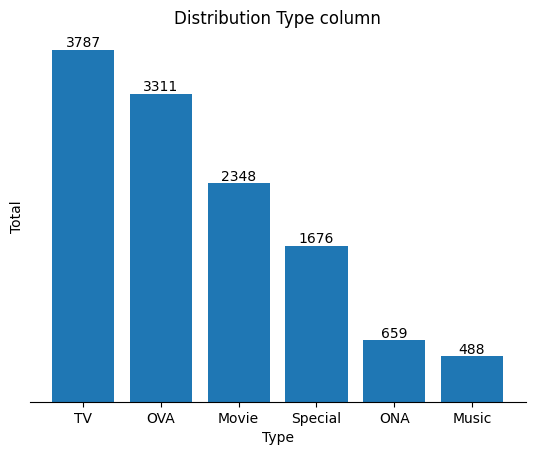

In [11]:
df_type = anime_db['type'].value_counts()

plt.bar(df_type.index, df_type.values)

#Labels
plt.xlabel('Type')
plt.ylabel('Total')
plt.title('Distribution Type column')

#Hide lines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
# hide ticks
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# show values in each bar
for index, value in zip(df_type.index, df_type.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

In this part we need to cleaning the column Genre, because one Anime would have a lot of genres. So we need to split

In [12]:
anime_db['genre'].unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai, Sports', 'Drama, Romance, School, Yuri',
       'Hentai, Slice of Life'], dtype=object)

We have a lot of genres in string separate by commas (,). For this I will:
1. Use split to separate the string into a list of genres
2. Expand the columns by genres

In [13]:
anime_db['genre_list'] = anime_db['genre'].str.split(', ')
anime_db

,anime_id,name,genre,type,episodes,rating,members,genre_list
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"[Drama, Romance, School, Supernatural]"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,"[Action, Adventure, Drama, Fantasy, Magic, Mil..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,"[Action, Comedy, Historical, Parody, Samurai, ..."
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,"[Sci-Fi, Thriller]"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,"[Action, Comedy, Historical, Parody, Samurai, ..."
...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,[Hentai]
12290,5543,Under World,Hentai,OVA,1,4.28,183,[Hentai]
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,[Hentai]
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,[Hentai]


In [14]:
# Expandir la lista de géneros en nuevas columnas
expand_gen = anime_db['genre_list'].apply(pd.Series)

expand_gen

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Drama,Romance,School,Supernatural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Action,Adventure,Drama,Fantasy,Magic,Military,Shounen,NaN,NaN,NaN,NaN,NaN,NaN
2,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,NaN,NaN,NaN,NaN,NaN,NaN
3,Sci-Fi,Thriller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,Hentai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12290,Hentai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12291,Hentai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12292,Hentai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Create an empty set to store unique genres
unique_genres = set()

# Iterate over each row of the DataFrame
for index, row in expand_gen.iterrows():
    # Iterate over each element in the row
    for genre in row:
        # If the element is not NaN, add it to the set of unique genres
        if pd.notnull(genre):
            unique_genres.add(genre)

# Convert the set of unique genres into a list
unique_genre_list = list(unique_genres)

print(unique_genre_list)
print("All genres:",len(unique_genre_list))

['Shoujo Ai', 'Vampire', 'Historical', 'Music', 'Super Power', 'Cars', 'Slice of Life', 'Mecha', 'Yaoi', 'Hentai', 'Adventure', 'School', 'Kids', 'Supernatural', 'Martial Arts', 'Horror', 'Game', 'Magic', 'Shoujo', 'Action', 'Seinen', 'Military', 'Shounen Ai', 'Sports', 'Police', 'Drama', 'Shounen', 'Josei', 'Demons', 'Romance', 'Space', 'Parody', 'Psychological', 'Samurai', 'Ecchi', 'Thriller', 'Mystery', 'Yuri', 'Harem', 'Sci-Fi', 'Dementia', 'Fantasy', 'Comedy']
All genres: 43


In [16]:
for genre in unique_genre_list:
    # Check if the genre is present in any genre list of each record
    genre_present = [genre in genres if isinstance(genres, list) else False for genres in anime_db['genre_list']]
    
    anime_db[genre] = genre_present

In [17]:
anime_db.drop('genre', axis=1, inplace=True)
anime_db

,anime_id,name,type,episodes,rating,members,genre_list,Shoujo Ai,Vampire,Historical,...,Samurai,Ecchi,Thriller,Mystery,Yuri,Harem,Sci-Fi,Dementia,Fantasy,Comedy
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,"[Drama, Romance, School, Supernatural]",False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,28977,Gintama°,TV,51,9.25,114262,"[Action, Comedy, Historical, Parody, Samurai, ...",False,False,True,...,True,False,False,False,False,False,True,False,False,True
3,9253,Steins;Gate,TV,24,9.17,673572,"[Sci-Fi, Thriller]",False,False,False,...,False,False,True,False,False,False,True,False,False,False
4,9969,Gintama&#039;,TV,51,9.16,151266,"[Action, Comedy, Historical, Parody, Samurai, ...",False,False,True,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,OVA,1,4.15,211,[Hentai],False,False,False,...,False,False,False,False,False,False,False,False,False,False
12290,5543,Under World,OVA,1,4.28,183,[Hentai],False,False,False,...,False,False,False,False,False,False,False,False,False,False
12291,5621,Violence Gekiga David no Hoshi,OVA,4,4.88,219,[Hentai],False,False,False,...,False,False,False,False,False,False,False,False,False,False
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,OVA,1,4.98,175,[Hentai],False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# Drop non-genre columns
genre_columns = anime_db.drop(['anime_id', 'name', 'type', 'episodes', 'rating', 'members', 'genre_list'], axis=1)

# Count the number of True values in each column
genre_counts = genre_columns.sum().sort_values(ascending = False).head(7)

print(genre_counts)


Comedy       4645
Action       2845
Adventure    2348
Fantasy      2309
Sci-Fi       2070
Drama        2016
Shounen      1711
dtype: int64


### 2. Top by genre

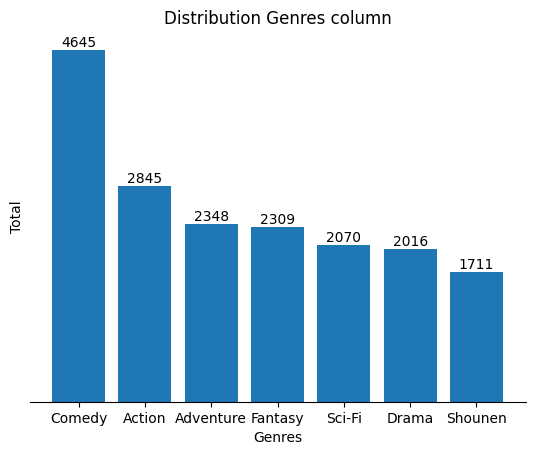

In [19]:

plt.bar(genre_counts.index, genre_counts.values)

#Labels
plt.xlabel('Genres')
plt.ylabel('Total')
plt.title('Distribution Genres column')

#Hide lines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
# hide ticks
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# show values in each bar
for index, value in zip(genre_counts.index, genre_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

The most popular genres in animes are Comedy, following by Action and Adventure.

Member Scorescaler = MinMaxScaler(feature_range=(0, 10))

In [20]:
anime_db['members_score'] = anime_db['members']/max(anime_db['members'])*10
anime_db.head()

,anime_id,name,type,episodes,rating,members,genre_list,Shoujo Ai,Vampire,Historical,...,Ecchi,Thriller,Mystery,Yuri,Harem,Sci-Fi,Dementia,Fantasy,Comedy,members_score
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,"[Drama, Romance, School, Supernatural]",False,False,False,...,False,False,False,False,False,False,False,False,False,1.978762
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",False,False,False,...,False,False,False,False,False,False,False,True,False,7.827712
2,28977,Gintama°,TV,51,9.25,114262,"[Action, Comedy, Historical, Parody, Samurai, ...",False,False,True,...,False,False,False,False,False,True,False,False,True,1.126936
3,9253,Steins;Gate,TV,24,9.17,673572,"[Sci-Fi, Thriller]",False,False,False,...,False,True,False,False,False,True,False,False,False,6.643266
4,9969,Gintama&#039;,TV,51,9.16,151266,"[Action, Comedy, Historical, Parody, Samurai, ...",False,False,True,...,False,False,False,False,False,True,False,False,True,1.491897


In [21]:
anime_db['total_score'] = anime_db['rating']*0.7 + anime_db['members_score']*0.3

I think rating is more important than members score. You could find underrated animes that aren't populas as you expect. So I decide to assign different weights for the total score

In [22]:
top5 = anime_db.sort_values(by='total_score', ascending = False).reset_index()
top5[['name','total_score']].head()

,name,total_score
0,Death Note,9.097000
1,Fullmetal Alchemist: Brotherhood,8.830314
2,Shingeki no Kyojin,8.629782
3,Steins;Gate,8.411980
4,Code Geass: Hangyaku no Lelouch,8.297005


In [23]:
#What is the position of my favorite anime

top5[top5['name'] == 'One Piece']

,index,anime_id,name,type,episodes,rating,members,genre_list,Shoujo Ai,Vampire,...,Thriller,Mystery,Yuri,Harem,Sci-Fi,Dementia,Fantasy,Comedy,members_score,total_score
19,74,21,One Piece,TV,0,8.58,504862,"[Action, Adventure, Comedy, Drama, Fantasy, Sh...",False,False,...,False,False,False,False,False,False,True,True,4.979323,7.499797


In [24]:
anime_db.to_csv('new_anime.csv', index=False)